In [33]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [34]:
X = np.array([[1,2],
              [1.5,1.8],
              [5,8],
              [8,8],
              [1,0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

In [35]:
##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]
    

------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [1. 2.]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [1.5 1.8]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [5. 8.]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.]), 6: array([8., 2.]), 7: array([10.,  2.]), 8: array([9., 3.])}
------------ [8. 8.]
------ {0: array([1., 2.]), 1: array([1.5, 1.8]), 2: array([5., 8.]), 3: array([8., 8.]), 4: array([1. , 0.6]), 5: array([ 9., 11.

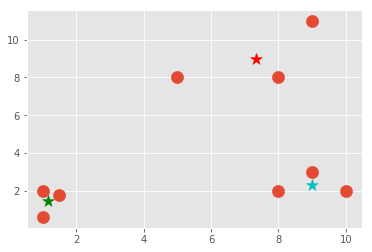

In [36]:
class Mean_Shift:
    def __init__(self,radius=5):
        self.radius = radius
        
    def fit(self,data):
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
            
        while True:
            new_centroids = []
            for i in centroids:
                print("------",centroids)
                in_bandwidth = []
                centroid = centroids[i]
                print("------------",centroid)
                for featureset in data:
                    if(np.linalg.norm(featureset-centroid) < self.radius):
                        in_bandwidth.append(featureset)
                new_centroid = np.average(in_bandwidth,axis=0)
                
                new_centroids.append(tuple(new_centroid))
            
            #print(new_centroids)

            uniques = sorted(list(set(new_centroids)))

            #print(uniques)
            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
            optimized = True
            for i in centroids:
                #if false then go inside the loop
                if(np.array_equal(centroids[i], prev_centroids[i])) != True:
                    optimized = False
                if optimized != True:
                    break
            if optimized:
                break
        self.centroids = centroids

clf=Mean_Shift(radius=5)
clf.fit(X)
centroids=clf.centroids
print(centroids)
plt.scatter(X[:,0],X[:,1],s=150)
for c in centroids:
    color=colors[c]
    plt.scatter(centroids[c][0],centroids[c][1],color=color,marker="*",s=150)
plt.show() 